In [1]:
import os
os.makedirs('out', exist_ok=True)

### Google Colabを利用する場合は、次のセルの全行の#を1つ削除して実行する

In [2]:
#!apt-get -y install fonts-ipafont-gothic
#!pip install japanize_matplotlib
#!pip install nysol

## Google Colabを利用する場合に以下のコマンドでGoogle Driveをマウント
#from google.colab import drive
#drive.mount('/content/drive')

## データフレームへの読み込み
## Google DriveのColab Notebooksにダウンロードしたフォルダ(marketing)をセットすることを想定
#iPath = '/content/drive/MyDrive/Colab Notebooks/marketing/Chapter_6/in/'
#iFile=iPath+'datQpr.csv'

#import pandas as pd
#import nysol.take as nt

## データの読み込み
#df = pd.read_csv(iFile

In [3]:
# コード 6.1 相関ルールを列挙するスクリプト

import pandas as pd
import nysol.take as nt

df = pd.read_csv('in/datQpr.csv')

In [4]:
df = df[['モニタ', '細分類名', '業態名']]
df = df[~df.duplicated(subset=['モニタ', '細分類名', '業態名'])]

conv = df[df['業態名'] == 'コンビニエンスストア']
drug = df[df['業態名'] == '薬粧店・ドラッグストア']
# mtra2gcで利用するためにCSVに保存
conv.to_csv('out/conv.csv', index=False)
drug.to_csv('out/drug.csv', index=False)


def calPat(ifile, id):
    # 相関ルールの実行
    nt.mtra2gc(tid="モニタ", item="細分類名", s="0.01", i=ifile,
               eo="out/pat%s" % (id)).run(msg="on")

    # 辺の情報としてJaccard上位100だけを保存
    rsl = pd.read_csv('out/pat%s' % (id))
    top100 = rsl.sort_values('jaccard', ascending=False).head(100)
    edge = top100[['node1%0', 'node2%1']]
    edge.to_csv('out/edge%s.csv' % (id), index=False, header=False)


calPat('out/conv.csv', "C")
calPat('out/drug.csv', "D")

#END# mtra2gc tid=モニタ item=細分類名 s=0.01 i=out/conv.csv eo=out/patC; 2021/08/29 16:46:20
#END# mtra2gc tid=モニタ item=細分類名 s=0.01 i=out/drug.csv eo=out/patD; 2021/08/29 16:46:21


NetworkXを使ったグラフの可視化
ドラッグストアの共起関係

52
100
32
100


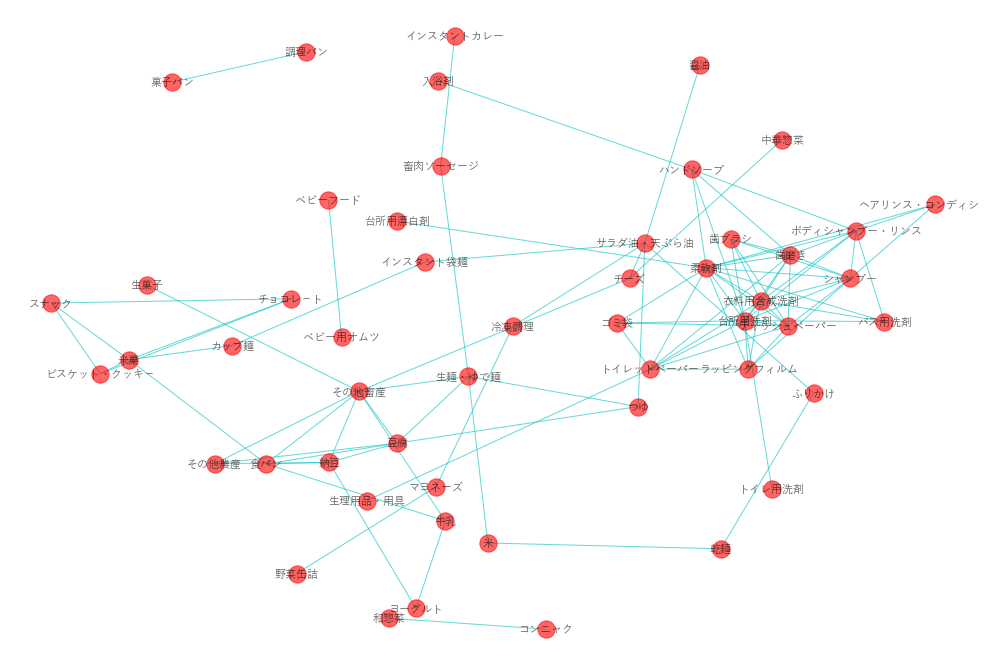

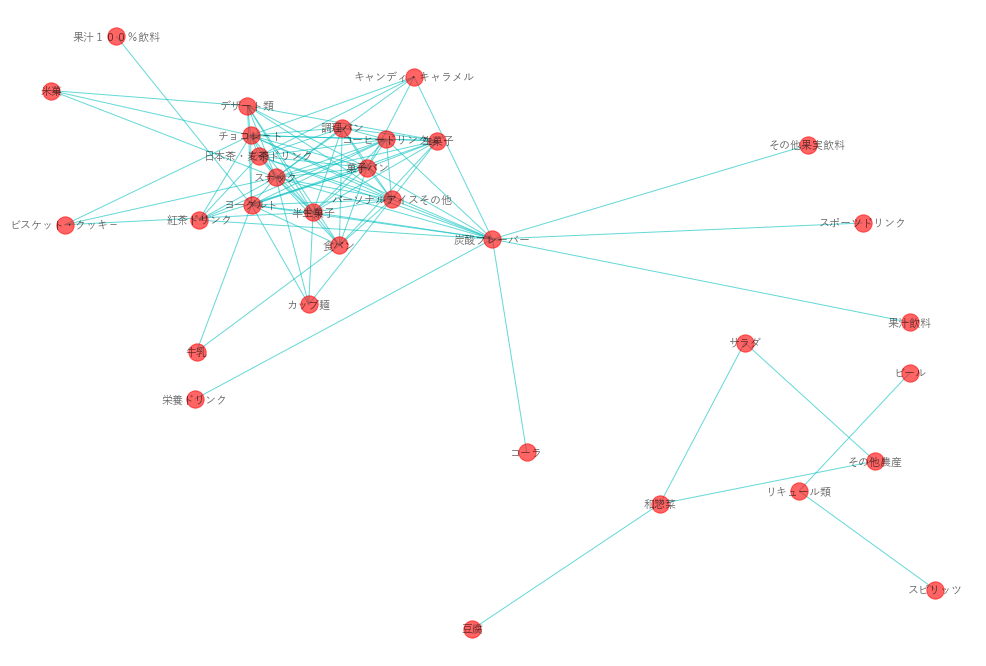

In [6]:
# コード 6.2 ネットワークを可視化するスクリプト
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import pathlib

# 環境に併せてフォントを選択
# Mac: YuGothic, Windows: MS Gothic Linux or Google Colab: IPAexGothic
font='YuGothic'
#font='IPAexGothic'
#font='MS Gothic'

def graphDraw(file):

    # 拡張子を除くファイル名取得
    fname = (pathlib.Path(file)).stem
    # グラフの作成
    G = nx.Graph()

    # ファイルの読み込み
    G = nx.read_edgelist(file, delimiter=',', nodetype=str)
    print(nx.number_of_nodes(G))  # ノード数をカウントして出力
    print(nx.number_of_edges(G))  # エッジ数をカウントして出力

    # グラフ描画のレイアウトを決定。バネモデルでk=はノードの距離を決めるパラメーター
    pos = nx.spring_layout(G, k=0.6, seed=4)

    plt.figure(figsize=(15, 12))  # 図のサイズを決定 (単位はインチ)
    plt.subplots_adjust(left=0.1, right=1)
    plt.axis('off')  # 軸は描画しない
    # ノードは赤色 (r)で透過率 (alpha=)60%、エッジはシアン (c)、文字サイズ 15インチ,フォントYuGothic(Mac),MS Gothic(Win)
    nx.draw_networkx(G, pos, node_color='r', alpha=0.6,
                     edge_color='c', font_size=11, font_family=font)
    plt.savefig("out/%s.png" % (fname))


graphDraw("out/edgeD.csv")
graphDraw("out/edgeC.csv")